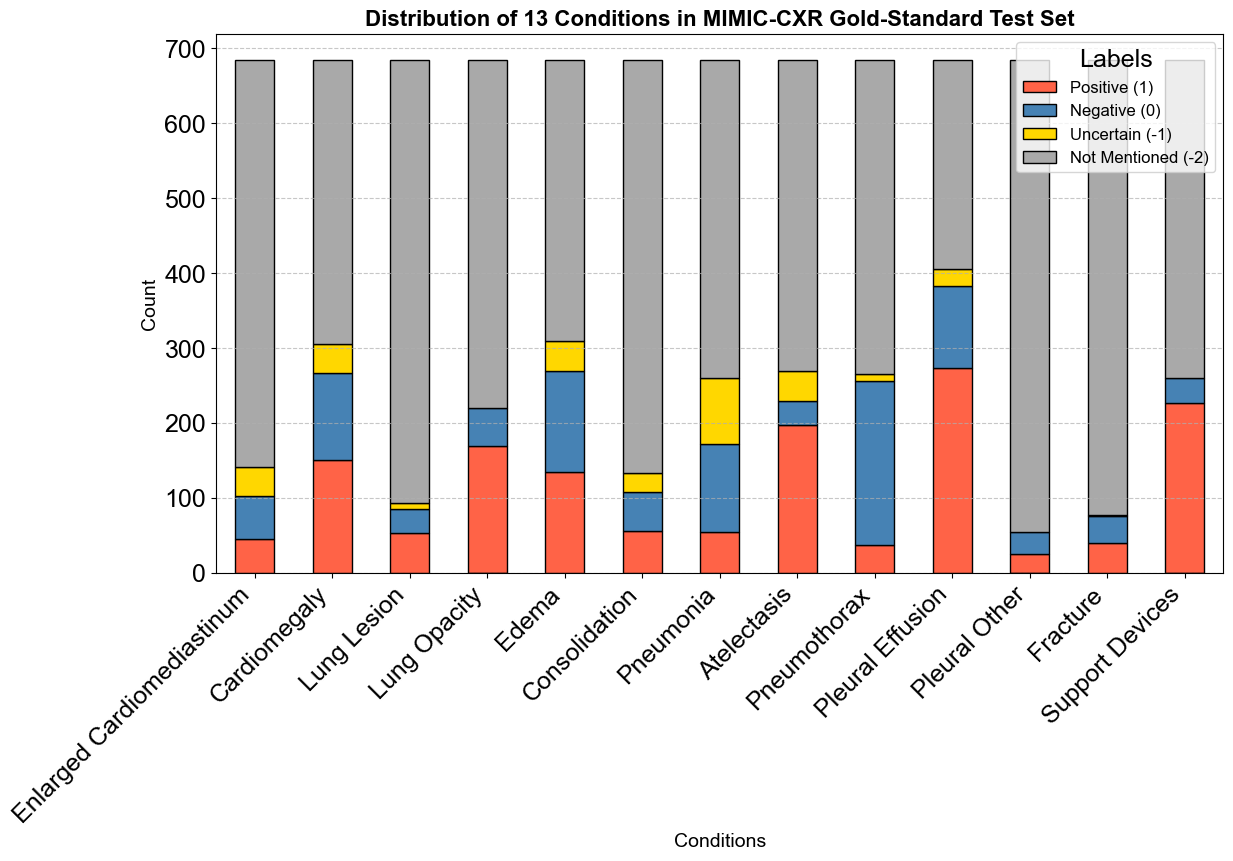

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set global font to Arial and increase font size
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 18

# Load the Excel file
file_path = "mimic-cxr-gold-standard.xlsx"
df = pd.read_excel(file_path)

condition_columns = df.columns[0:]

# Replace empty strings ("") and NaN values with -2 (Not Mentioned)
df[condition_columns] = df[condition_columns].replace("", -2).fillna(-2).astype(int)

# Define the correct label order: Positive (1), Negative (0), Uncertain (-1), Not Mentioned (-2)
label_order = [1, 0, -1, -2]

# Count occurrences of each label (-2, -1, 0, 1) for each condition
condition_counts = {}
for condition in condition_columns:
    condition_counts[condition] = df[condition].value_counts()

# Convert to DataFrame and reindex to ensure correct order
count_df = pd.DataFrame(condition_counts).fillna(0).astype(int)
count_df = count_df.reindex(label_order)

# Define colors based on label meaning
custom_colors = {
    1: '#FF6347',   # Red for Positive
    0: '#4682B4',   # Blue for Negative
    -1: '#FFD700',  # Yellow for Uncertain
    -2: '#A9A9A9'   # Gray for Not Mentioned
}

# Assign colors in order
color_list = [custom_colors[label] for label in label_order]

# Create figure
fig, ax = plt.subplots(figsize=(13, 7))
count_df.T.plot(kind='bar', stacked=True, figsize=(13, 7), color=color_list, edgecolor='black', ax=ax)

# Customize labels and title
ax.set_xlabel("Conditions", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
ax.set_title("Distribution of 13 Conditions in MIMIC-CXR Gold-Standard Test Set", fontsize=16, fontweight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Customize legend for clarity
ax.legend(title="Labels", labels=["Positive (1)", "Negative (0)", "Uncertain (-1)", "Not Mentioned (-2)"], fontsize=12)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save high-resolution images
plt.savefig("condition_distribution.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.savefig("condition_distribution.pdf", dpi=300, bbox_inches="tight")  # Save as PDF

# Show plot
plt.show()
